# Importing Libraries

In [242]:
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing 


# 1. Loading Dataset

In [300]:
def load_crime_data(fileName):
    
    r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names')
    all_columns = re.findall(r'\@attribute (\w*)', r.text)
    del r

    output_columns = ['ViolentCrimesPerPop']
    
    data = pd.read_csv(fileName, names=all_columns, index_col=False)
    
    return output_columns,all_columns,data


In [301]:
output_columns,all_columns,data  = load_crime_data('data\communities.data')

# 2. EDA

In [302]:
data.head(10)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [303]:
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [304]:
# data.hist()

In [305]:
data.isna().sum()

state                   0
county                  0
community               0
communityname           0
fold                    0
population              0
householdsize           0
racepctblack            0
racePctWhite            0
racePctAsian            0
racePctHisp             0
agePct12t21             0
agePct12t29             0
agePct16t24             0
agePct65up              0
numbUrban               0
pctUrban                0
medIncome               0
pctWWage                0
pctWFarmSelf            0
pctWInvInc              0
pctWSocSec              0
pctWPubAsst             0
pctWRetire              0
medFamInc               0
perCapInc               0
whitePerCap             0
blackPerCap             0
indianPerCap            0
AsianPerCap             0
                       ..
PctSameHouse85          0
PctSameCity85           0
PctSameState85          0
LemasSwornFT            0
LemasSwFTPerPop         0
LemasSwFTFieldOps       0
LemasSwFTFieldPerPop    0
LemasTotalRe

In [306]:
data = data.replace('?', np.nan)

In [307]:

data.isna().sum()

state                      0
county                  1174
community               1177
communityname              0
fold                       0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

In [308]:
len(data['ViolentCrimesPerPop'])

1994

In [309]:
for i in range(len(data['ViolentCrimesPerPop'])):
    if data['ViolentCrimesPerPop'][i] > 0.1:
        data['ViolentCrimesPerPop'][i] = 1  # High Crime
    else:
        data['ViolentCrimesPerPop'][i] = 0 # Low Crime Rate

c:\users\sahil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\sahil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [314]:

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = data.groupby('ViolentCrimesPerPop').size() * 100 / len(data)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

ViolentCrimesPerPop
0.0    37.261785
1.0    62.738215
dtype: float64
------------------
Percentage Positive Instance = 62.7382146439318
Percentage Negative Instance = 37.2617853560682 


In [315]:
data.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [316]:
# Non-predictive Categorical Variables 
for col in ['state','county','community','communityname']:
    data[col].fillna(0,inplace=True)

In [317]:
(data.isnull().sum()).tail()


LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
dtype: int64

In [318]:
# Filing null value with mean value

data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))


In [319]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,1.0
1,53,0,0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.02,0.02,0.84,0,0.00,0.12,1.0
2,24,0,0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.02,0.02,0.84,0,0.00,0.12,1.0
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.02,0.02,0.84,0,0.00,0.12,1.0
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.02,0.02,0.84,0,0.00,0.12,0.0


In [320]:
print("Missing values after Imputing : ", data.isnull().sum().sum())


Missing values after Imputing :  0


In [321]:
data = data.drop(['state','county','community','communityname','fold'],axis=1)

In [322]:
len(data.columns)

123

In [323]:
data.to_csv('data/clean_data.csv', encoding='utf-8')


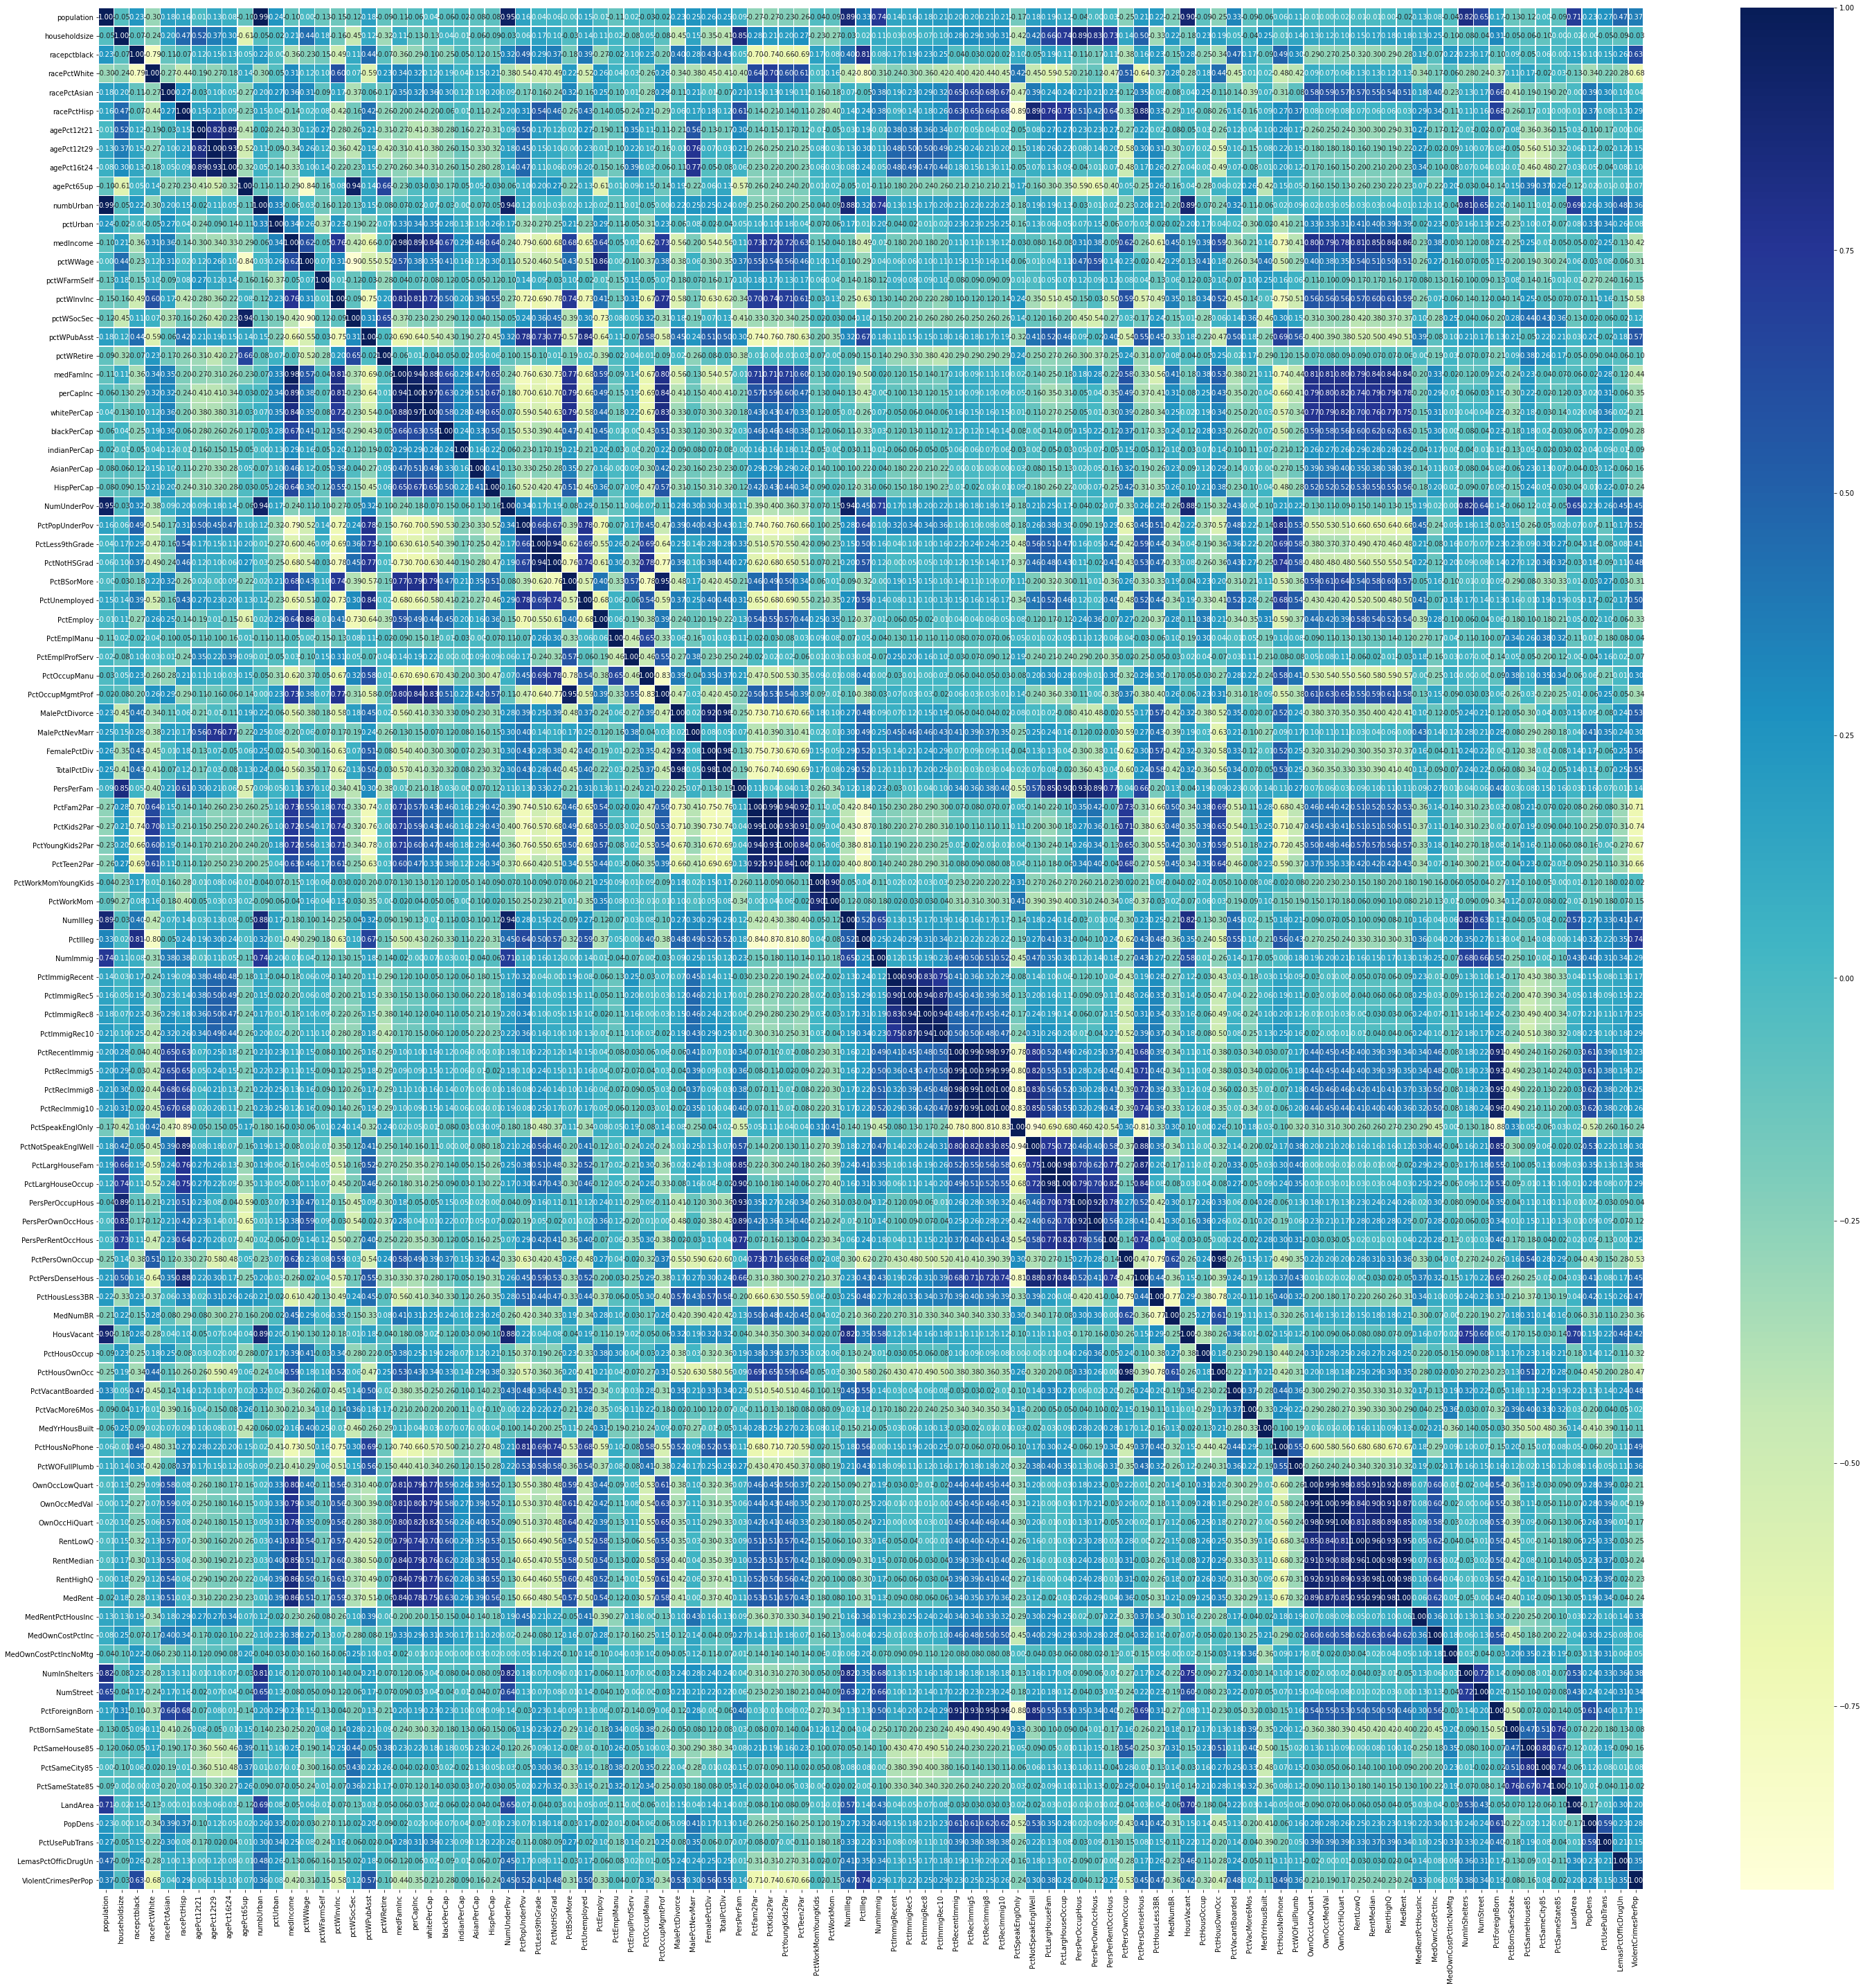

In [106]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(50,50))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f", 
                cmap = "YlGnBu");

In [324]:
all_col = data.columns


In [325]:
input_columns = all_col[:-1]

In [326]:
len(input_columns)

122

# 3. Splitting data (Training / Testing / Validation ) 

In [327]:
X = data[input_columns]
Y = data['ViolentCrimesPerPop']

In [328]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.19,0.02,0.12,0.45,0.02,0.02,0.84,0,0.00,0.12
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.19,0.01,0.21,0.02,0.02,0.02,0.84,0,0.00,0.12
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.02,0.39,0.28,0.02,0.02,0.84,0,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.19,0.04,0.09,0.02,0.02,0.02,0.84,0,0.00,0.12


In [329]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: ViolentCrimesPerPop, dtype: float64

# Normalization

In [330]:
Y = Y.values.reshape((Y.shape[0],1))
X = preprocessing.normalize(X)
Y = preprocessing.normalize(Y)
Y = Y.reshape((Y.shape[0],))

In [331]:
from collections import Counter
print(Counter(Y).keys())
print(Counter(Y).values())



dict_keys([1.0, 0.0])
dict_values([1251, 743])


In [332]:
X

array([[0.04108821, 0.07136374, 0.00432508, ..., 0.10812688, 0.0692012 ,
        0.03027553],
       [0.        , 0.03520005, 0.02640004, ..., 0.        , 0.        ,
        0.02640004],
       [0.        , 0.09842032, 0.11482371, ..., 0.        , 0.        ,
        0.02812009],
       ...,
       [0.03465583, 0.08014161, 0.05414973, ..., 0.        , 0.19710503,
        0.0606477 ],
       [0.0161467 , 0.10293519, 0.01211002, ..., 0.        , 0.04440342,
        0.03633007],
       [0.03685304, 0.14372686, 0.02579713, ..., 0.0921326 , 0.18426521,
        0.02395448]])

In [333]:

def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [334]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, Y, 0.7, 0.1, 0.2)

In [335]:
len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(1395, 200, 399, 1395, 200, 399)

# 4. StandardScaler

In [336]:
# from sklearn.preprocessing import StandardScaler

In [337]:
# ss=StandardScaler()
# X_train=ss.fit_transform(X_train)
# X_test=ss.fit_transform(X_test)
# X_val=ss.fit_transform(X_val)

In [338]:
X_train

array([[0.00201209, 0.11670138, 0.00201209, ..., 0.        , 0.        ,
        0.02414511],
       [0.00663772, 0.05973948, 0.03540118, ..., 0.        , 0.        ,
        0.02655088],
       [0.00411675, 0.10497717, 0.00617513, ..., 0.        , 0.        ,
        0.02470051],
       ...,
       [0.00624917, 0.1374818 , 0.00624917, ..., 0.        , 0.        ,
        0.02499669],
       [0.00208557, 0.12930508, 0.00208557, ..., 0.        , 0.        ,
        0.02502679],
       [0.00471498, 0.15559423, 0.02043157, ..., 0.        , 0.        ,
        0.01885991]])

# 5. Creating Neural Network Model

In [343]:
#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=500,activation="relu",input_dim=122))

#2nd hidden layer
model.add(Dense(units=300,activation="relu",))

#3rd hidden layer
model.add(Dense(units=100,activation="relu",))

#output layer
model.add(Dense(units=1,activation="sigmoid"))



In [344]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               61500     
_________________________________________________________________
dense_33 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 101       
Total params: 242,001
Trainable params: 242,001
Non-trainable params: 0
_________________________________________________________________


# 6. Compiling Model

In [345]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# 7. Training Model

In [346]:
model_his=model.fit(X_train,y_train, validation_data=(X_val, y_val), batch_size=16,epochs=100,verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 0.4896 - accuracy: 0.7391 - val_loss: 0.3887 - val_accuracy: 0.8100
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3912 - accuracy: 0.8158 - val_loss: 0.4112 - val_accuracy: 0.7800
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8194 - val_loss: 0.3789 - val_accuracy: 0.8100
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8272 - val_loss: 0.3925 - val_accuracy: 0.8050
Epoch 5/100
88/88 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8308 - val_loss: 0.3664 - val_accuracy: 0.8350
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.8315 - val_loss: 0.3702 - val_accuracy: 0.8350
Epoch 7/100
88/88 [==============================] - 1s 6ms/step - loss: 0.3480 - accuracy: 0.8387 - val_loss: 0.3570 - val_accuracy: 0.8400
Epoch 8/100
8

Epoch 59/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.8903 - val_loss: 0.5728 - val_accuracy: 0.8250
Epoch 60/100
88/88 [==============================] - 1s 7ms/step - loss: 0.2176 - accuracy: 0.9032 - val_loss: 0.6534 - val_accuracy: 0.8200
Epoch 61/100
88/88 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.9039 - val_loss: 0.6086 - val_accuracy: 0.8300
Epoch 62/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.8925 - val_loss: 0.5996 - val_accuracy: 0.8150
Epoch 63/100
88/88 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.8903 - val_loss: 0.6477 - val_accuracy: 0.8300
Epoch 64/100
88/88 [==============================] - 0s 5ms/step - loss: 0.2099 - accuracy: 0.8961 - val_loss: 0.6047 - val_accuracy: 0.8150
Epoch 65/100
88/88 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.9032 - val_loss: 0.7487 - val_accuracy: 0.8100
Epoch 

# 8. Evaluating Model

In [347]:
scores = model.evaluate(X_train,y_train, verbose=1)
print(scores)

44/44 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9706
[0.07764449715614319, 0.9706093072891235]


# 9. Testing Model

In [348]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)

In [349]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7819548872180451


# 10. Confusion Matrix

In [350]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[109  34]
 [ 53 203]]


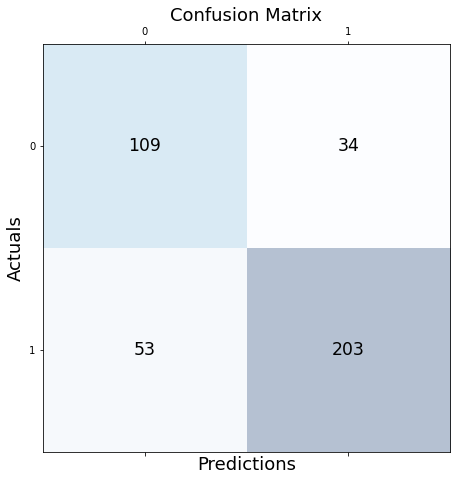

In [351]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [352]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       143
         1.0       0.86      0.79      0.82       256

    accuracy                           0.78       399
   macro avg       0.76      0.78      0.77       399
weighted avg       0.79      0.78      0.78       399



# 11. summarize history for accuracy

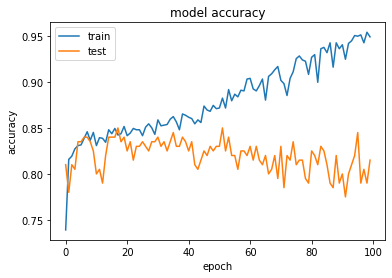

In [353]:
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 12.summarize history for loss

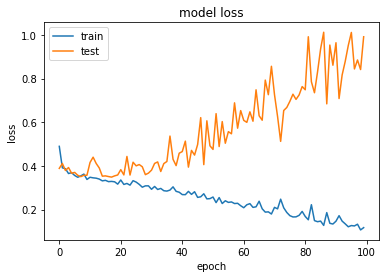

In [354]:
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 13 Serialize model to JSON


In [355]:
model_json = model.to_json()
with open("Communities_Crime.json", "w") as json_file:
    json_file.write(model_json)
    
    



# 14. Serialize weights to HDF5


In [356]:
model.save_weights("Communities_Crime.h5")